<a href="https://colab.research.google.com/github/TabassumPatel4458/CAPSTONE-PROJECT-4-UNSUPERVISED-LEARNING/blob/main/Capstone_Project_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV shows clustering (Unsupervised ML)



##### **Project Type**    :- Unsupervised ML
##### **Contribution**    :- Team(Data Pirates)
##### **Team Member 1 :-Tabassum Patel (Team Leader)**
##### **Team Member 2 :-Shubham Kodape**
##### **Team Member 3 :-Asma Patel**
##### **Team Member 4 :-anuja Ghotekar**
##### **Team Member 5 :-Pratiksha Auti**

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Approaches:-

Step 1 - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

Step 2 - We performed 3 hypothesis testing one comparing means for two variavles using T-test , second was asssociation of target age and country using chi_square test, last was asssociation of target age and duration using chi_square test.

Step 3 - Presence of null values would have created possible errors in the further steps, so we replaced few values with null, few with the word "unknown" few were dropped.

Step 4 - As a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.

Step 5 - Last step was to perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering. Recommendation system function was also developed.



# **GitHub Link -**

1. https://github.com/Asmapatel21

2. https://github.com/Anujaghotekar

3. https://github.com/Prati15s

4. https://github.com/Shubham999-code

5. https://github.com/TabassumPatel4458

# **Problem Statement**


 **This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [125]:
# Import Libraries
#neccessary packages
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [126]:
# Load Dataset
netflix_df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')


In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [128]:
# Dataset First Look(top 5 rows)
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [129]:
# Dataset Rows & Columns count
netflix_df.shape


(7787, 12)

### Dataset Information

In [130]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [131]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

In [132]:
# lets create function to determine missing values,unique values in columns
def Complete_columns_info(df):
  mis_val=netflix_df.isnull().sum()
  per_mis=netflix_df.isnull().sum()/len(df)*100
  unique_val=netflix_df.nunique()
  cci_table=pd.concat([mis_val,per_mis, unique_val],axis=1)
  cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
  cci_table['Data Type'] = df.dtypes
  cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
  print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
  return cci_table

#### Missing Values/Null Values

In [133]:
# Missing Values/Null Values Count
Complete_columns_info(netflix_df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

<Axes: >

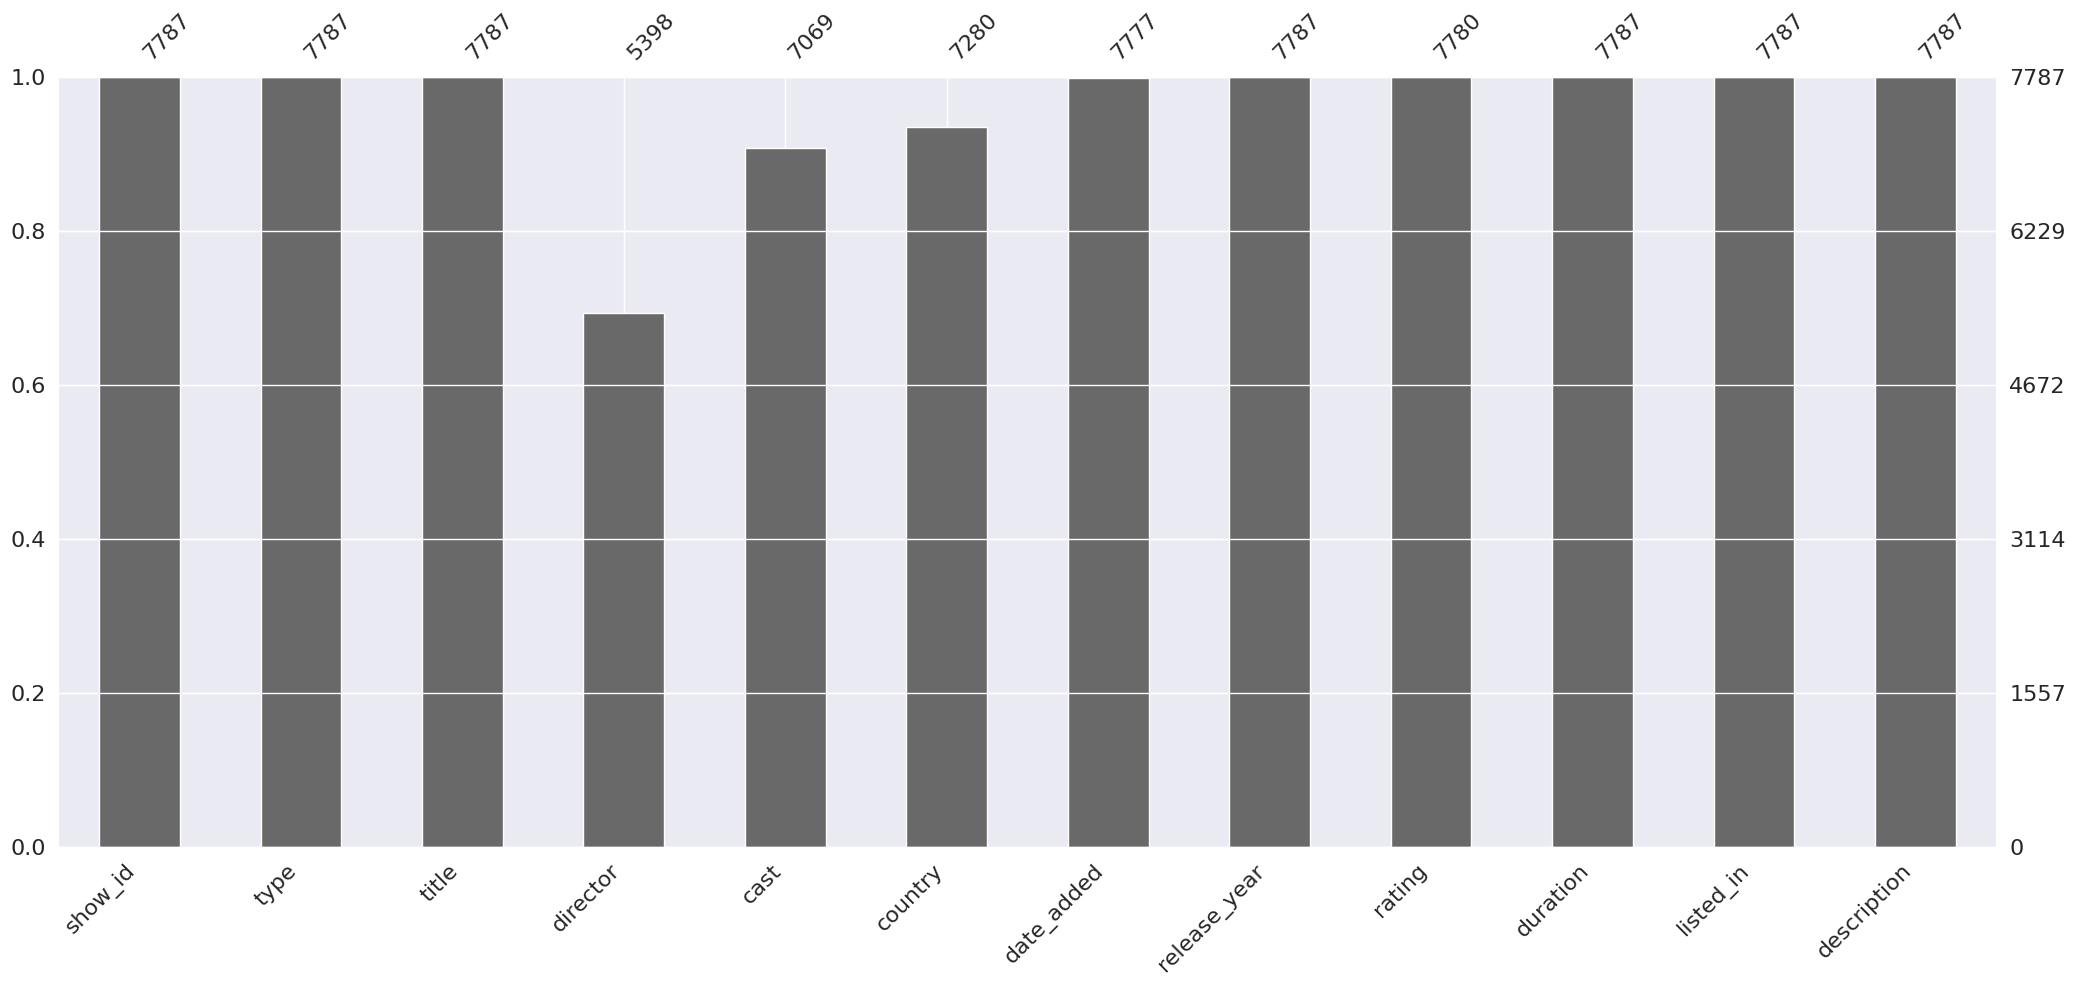

In [134]:
plt.figure(figsize=(20,20))
msno.bar(netflix_df)

### What did you know about your dataset?

Answer Here: 

*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

## ***2. Understanding Your Variables***

In [135]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [136]:
# Dataset Describe
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description
 
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [137]:
# Check Unique Values for each variable.
Complete_columns_info(netflix_df)

 selected dataframe has 12 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1565   
rating                        7               0.1                   14   
show_id                       0               0.0                 7787   
type                          0               0.0                    2   
title                         0               0.0                 7787   
release_year                  0               0.0                   73   
duration                      0               0.0                  216   
listed_in                     0               0.0                  492   
description                   0               0.0                 7769   

             Data Type  
director        object  
cast            object  
country         object  
date_added      object  
rating          object  
show_id         object  
type            object  
title           object  
release_year     int64  
duration        object  
listed_in       object  
description     object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [138]:

# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately :
# First convert date_added to date time format.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
  
# Compute day. 
netflix_df['day_added'] = netflix_df['date_added'].dt.day   

# Compute year.        
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Compute month.
netflix_df['month_added'] = netflix_df['date_added'].dt.month  

#  Creating two extra columns 
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = netflix_df[netflix_df['type']=='Movie'].copy()
df_shows = netflix_df[netflix_df['type']=='TV Show'].copy()

# fixing data types
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['ratings_cat'] = netflix_df['rating'].replace(to_replace = custom_rating)
netflix_df['ratings_cat'].unique()

netflix_df['type'] = pd.Categorical(netflix_df['type'])

# ratings_cat is another category (4 classes)
netflix_df['ratings_cat'] = pd.Categorical(netflix_df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# changing dtype to string
netflix_df['type']= netflix_df['type'].astype('string')
netflix_df['title']= netflix_df['title'].astype('string')
netflix_df['director']= netflix_df['director'].astype('string')
netflix_df['cast']= netflix_df['cast'].astype('string')
netflix_df['country']= netflix_df['country'].astype('string')
netflix_df['rating']= netflix_df['rating'].astype('string')
netflix_df['listed_in']= netflix_df['listed_in'].astype('string')
netflix_df['description']= netflix_df['description'].astype('string')

### What all manipulations have you done and insights you found?

*   Date time column was converted into datetime format and information like day, month and year was extracted from it into new columns.
*   Dataset was split into separate datasets with respect to 'type' column i.e., movie and TV shows for better insights.

*   Duration Manipulation: 
      * Movies dataframe: duration is converted into integer
      * TV shows dataframe: 'seasons' word was removed and only integer value was kept as number of seasons.



*   There were several categories in rating column so for better understanding we categorized it into 4 basic categories i.e., kids, older kids, teens and adults. 

*   Suitable columns datatypes were converted from object type to string format to make the data processable.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Univariate Analysis**

#### Chart - 1

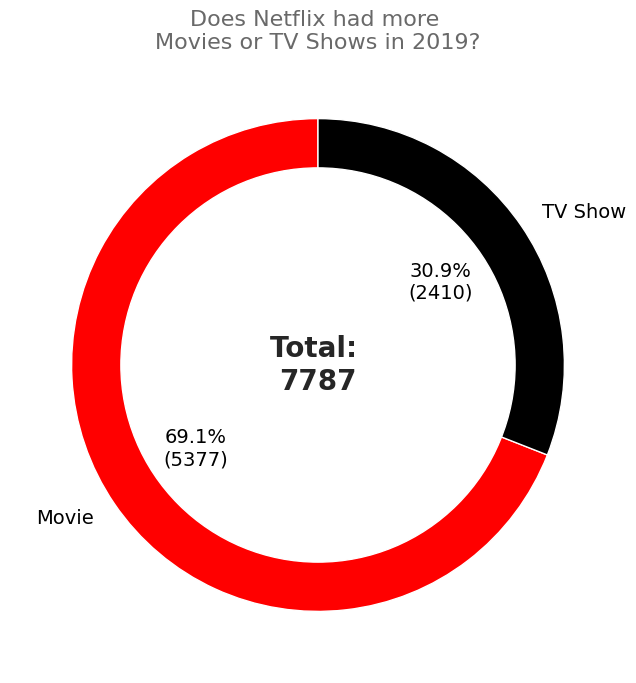

In [139]:
# Chart - 1 visualization code
# Balance of Netflix products
plot_donut_chart(df=netflix_df, col='type', colors=['red','black'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

##### 1. Why did you pick the specific chart?

Donut chart is a great way to represent share of various attributes in total pool.

##### 2. What is/are the insight(s) found from the chart?

There are more number of movies than TV shows on netlix dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retension due to more duration and story complexity.

#### Chart - 2

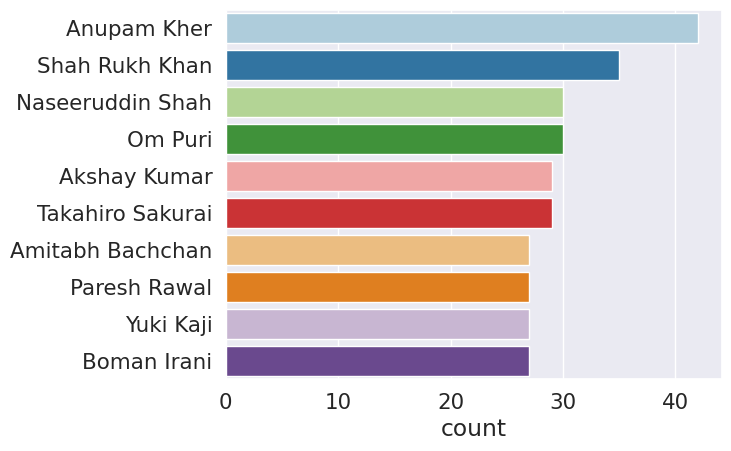

In [140]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution.

##### 2. What is/are the insight(s) found from the chart?

 The above graph shows top 10 actors who have worked in loads of movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 3

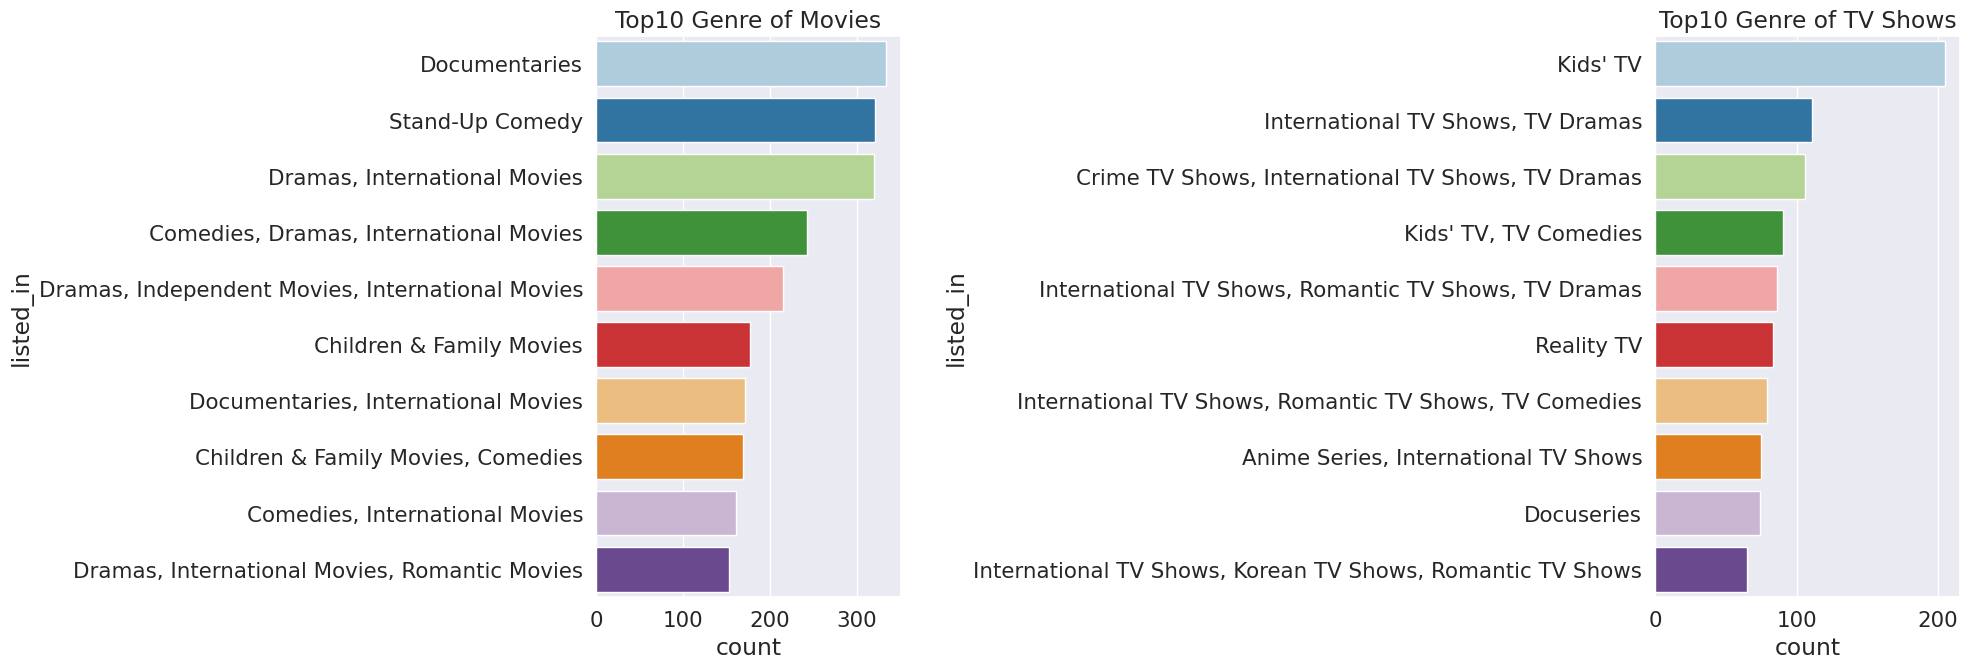

In [141]:
# Chart - 3 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.



##### 2. What is/are the insight(s) found from the chart?

* Documentaries are the top most genre in the netflix movies
* Kids TV is the top most genre in netflix TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 According to personal experience and observation comedy movies are more preferred but are less in database, thus it should be promoted to attract wide audience.

#### Chart - 4

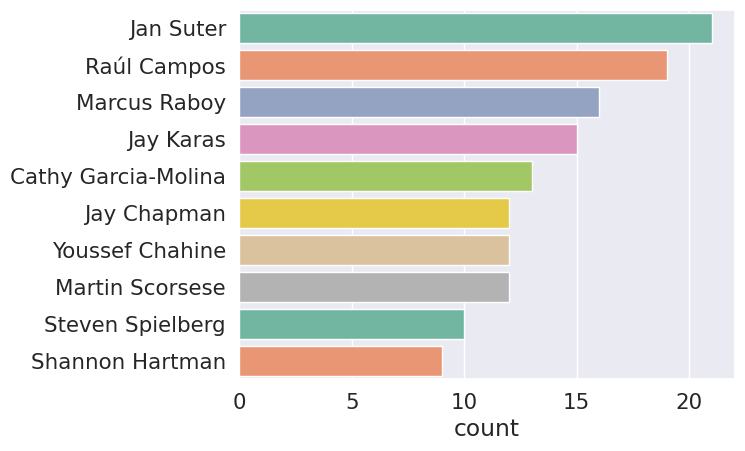

In [142]:
# Chart - 4 visualization code
# graph for different rating on movies and tv shows
# Graph for top 10 directors
directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

 we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

 This visual shows Jan suter and Raul Campos are the leading directors.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

: It will be better to cast popular actors as they have huge fanbase and better experience.

#### Chart - 5

Text(0.5, 0, 'Month -> (Content added to Netflix) ')

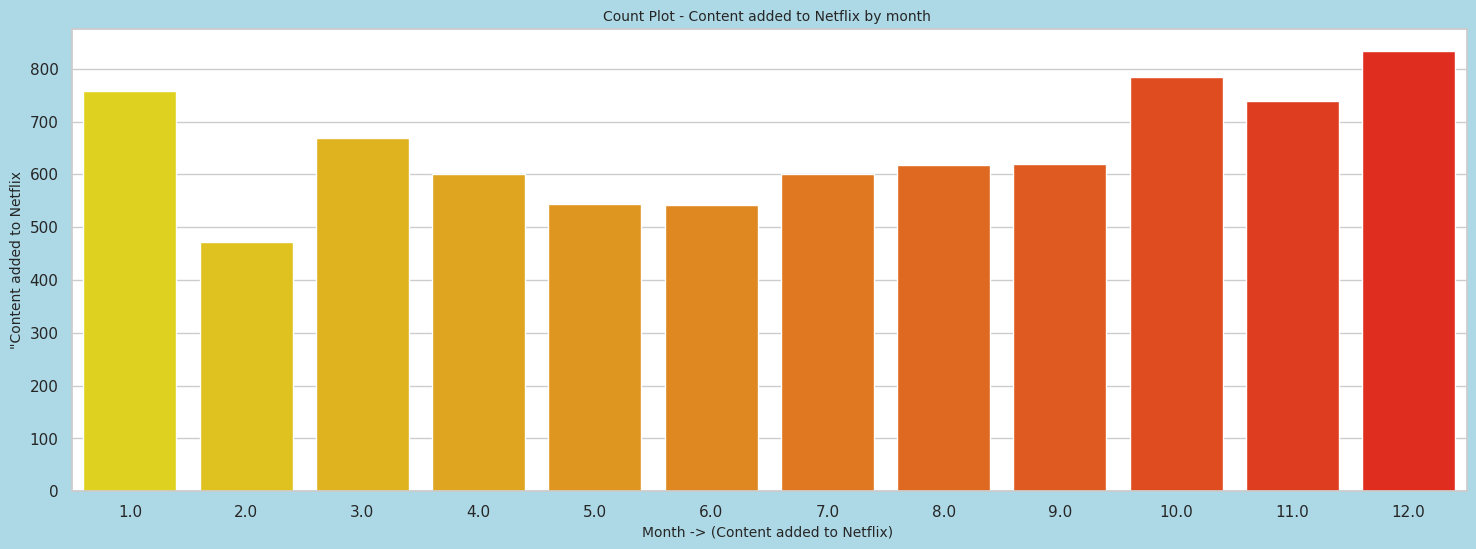

In [143]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=netflix_df,x = 'month_added',palette ="autumn_r")
plt.title('Count Plot - Content added to Netflix by month ', fontsize=10)
plt.ylabel('"Content added to Netflix', fontsize=10)
plt.xlabel('Month -> (Content added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies were found to be released in the month of october, november, december and january.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is wide gap in new content release in mid year, so this can be filled.

#### Chart - 6

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

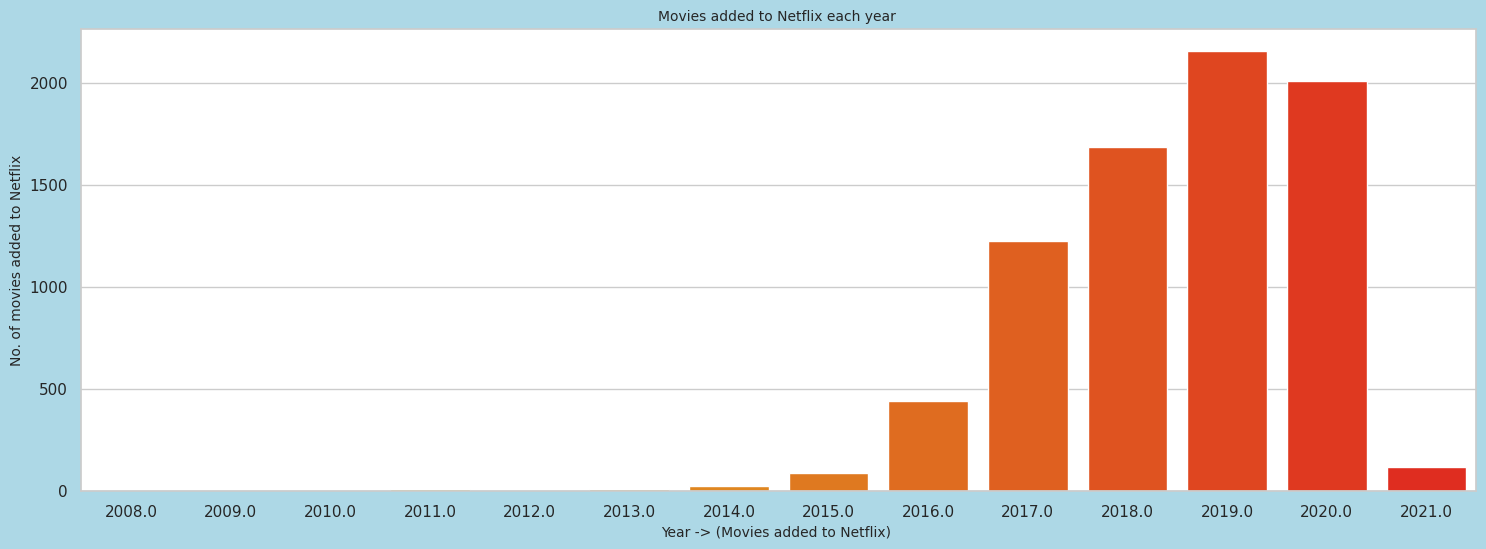

In [144]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = netflix_df,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare. 

##### 2. What is/are the insight(s) found from the chart?

There is linear augmentation in the release of movies from the year 2015 with its peak in the year 2019 followed by a sudden downfall in the year 2021, which was due to covid (lockdown).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Due to covid outbreak large number of audience is inclining towards OTT platforms than physical theatres.

#### Chart - 7

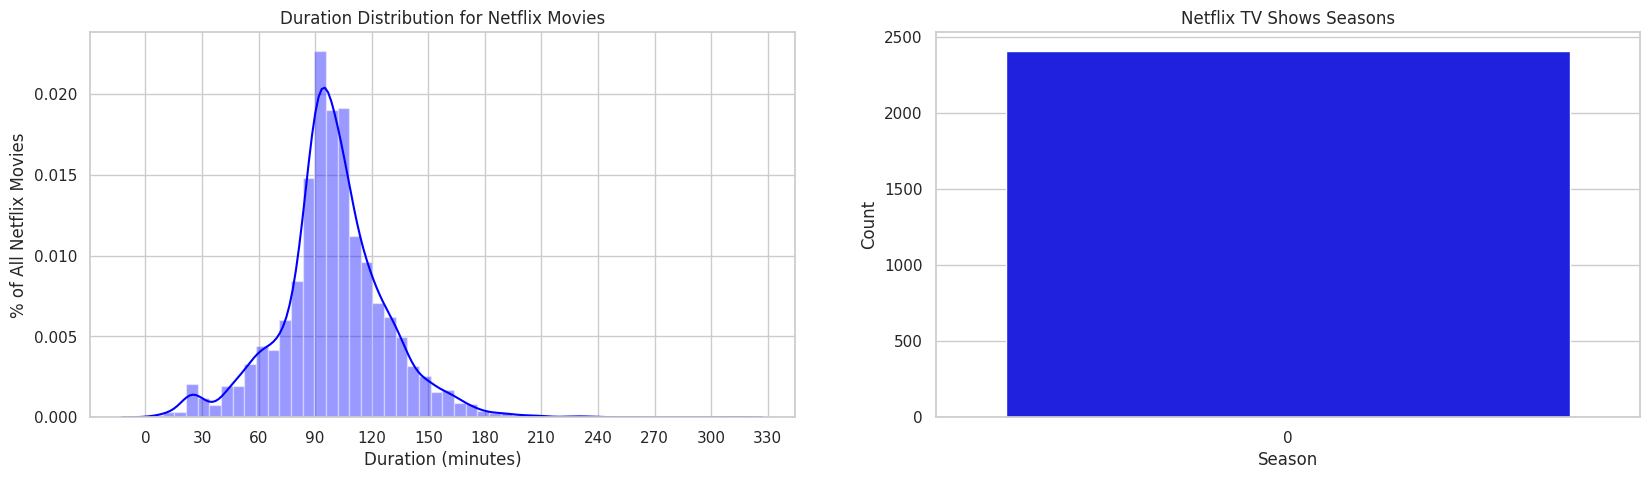

In [145]:
# Chart - 7 visualization code
fig, ax = plt.subplots(1,2 ,figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

In [146]:
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

*   Most of the movies have duration of 90 mins.
*   Most of the TV shows have one season, but this number goes on decreasing with increase in number seasons.


# **Bivariate Analysis**

#### Chart - 8

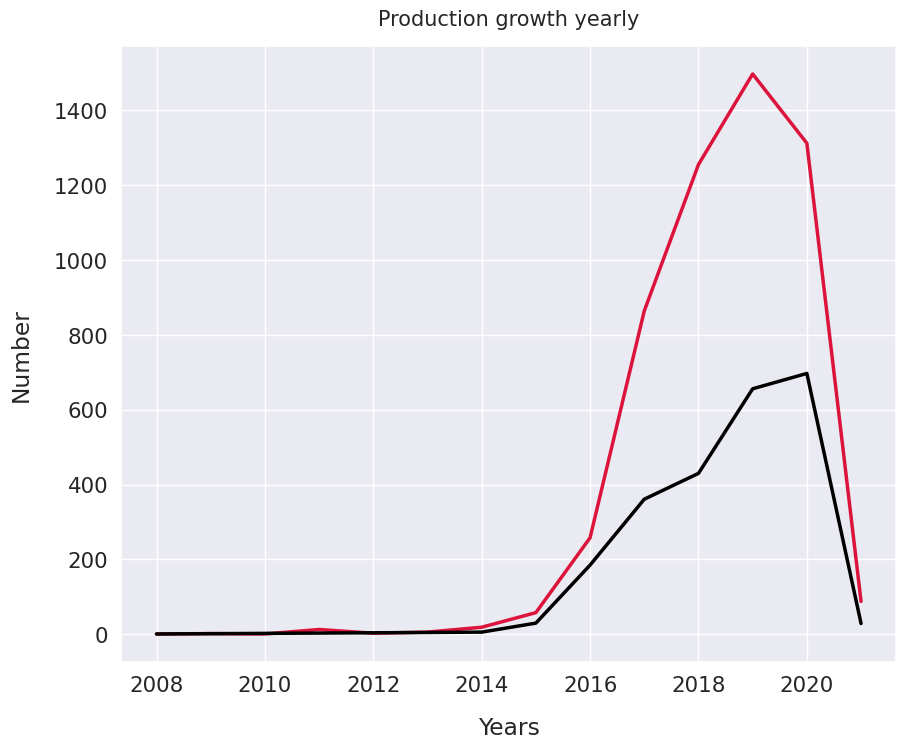

In [147]:
# Chart - 8 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year_added'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year_added'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(10, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(10, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=15);

##### 1. Why did you pick the specific chart?

##### line graph show data variables and trends clearly and can help to make prediction about the result of data.

##### 2. What is/are the insight(s) found from the chart?

In the year 2019 more number of movies were released as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retention due to more duration and story complexity.

#### Chart - 9

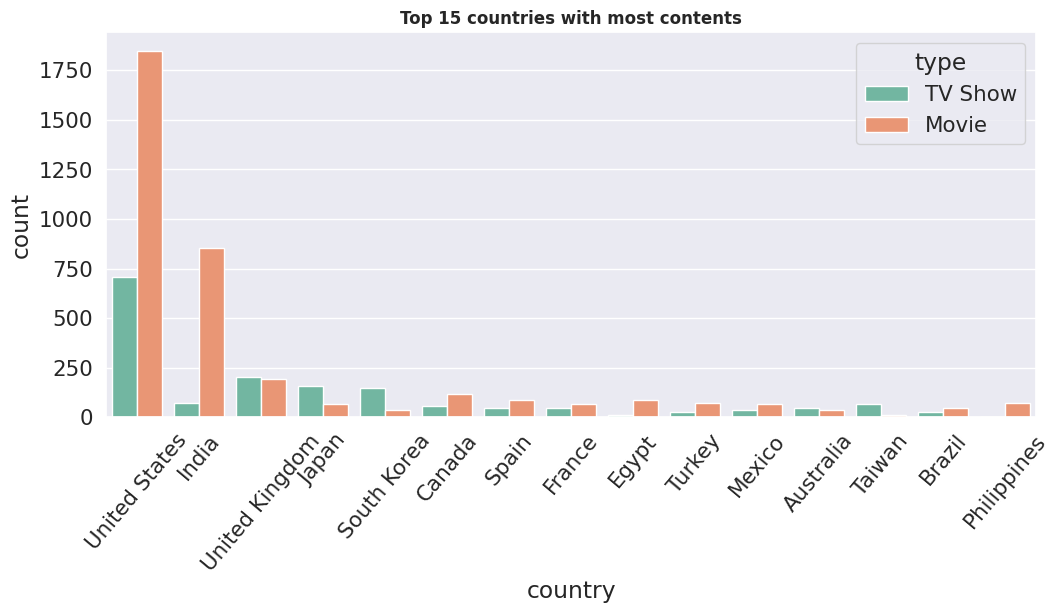

In [148]:
# Chart - 9 visualization code
#Analysing top15 countries with most content 
plt.figure(figsize=(12,5))
sns.countplot(x=netflix_df['country'],order=netflix_df['country'].value_counts().index[0:15],hue=netflix_df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=12, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis. 

##### 2. What is/are the insight(s) found from the chart?

#####United state have higher no of content.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that very large variety of content is not available for India and severl other countries thus missing variety should be made available for other countries to provide better options for audience and to increase engagement.

#### Chart - 10

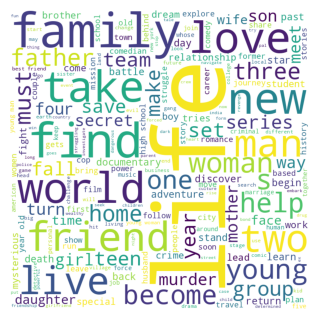

In [149]:
# Chart - 10 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in netflix_df.description.values:
    
    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image                      
plt.figure(figsize = (10,3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


##### 1. Why did you pick the specific chart?

: A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

Family, Life, Find, Love are the most used words in the description column.

#### Chart - 11

<BarContainer object of 11 artists>

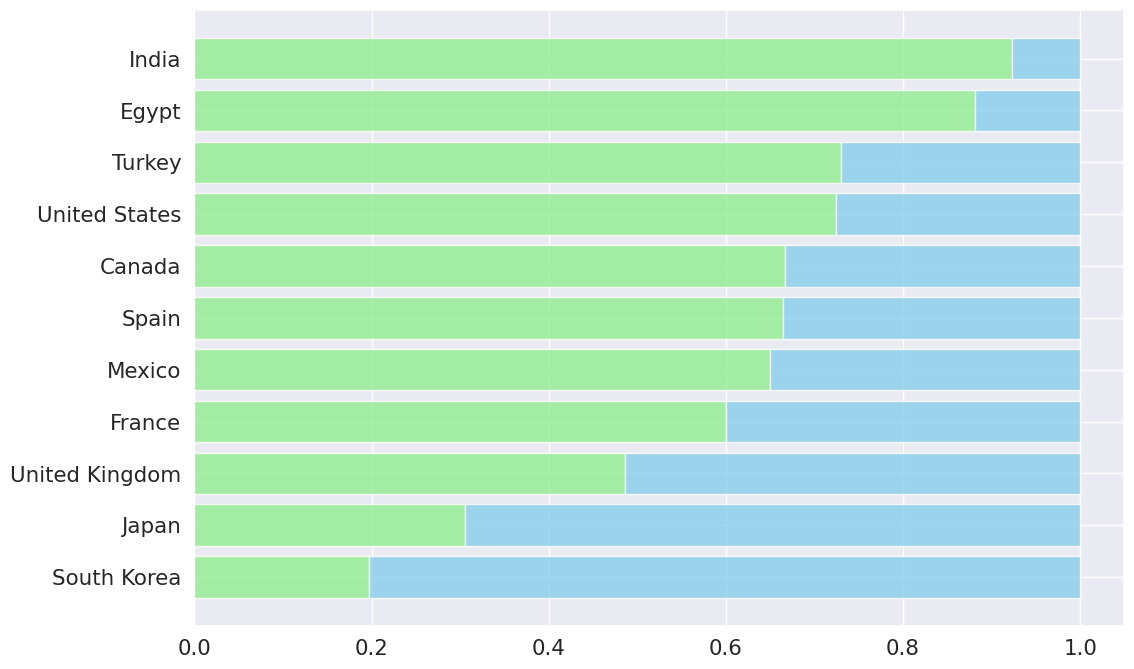

In [150]:
# Chart - 11 visualization code
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix_df['country'].value_counts()[:11].index
content_data = netflix_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(12, 8))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='lightgreen', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='TV Show')   

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis

##### 2. What is/are the insight(s) found from the chart?

 India has number of movies releases than TV shows followed by Egypt with highest movie releases and less TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 India has less number TV shows as compared to other countries, thus this gap can be filled by producing more TV shows originated in India.

#### Chart - 12

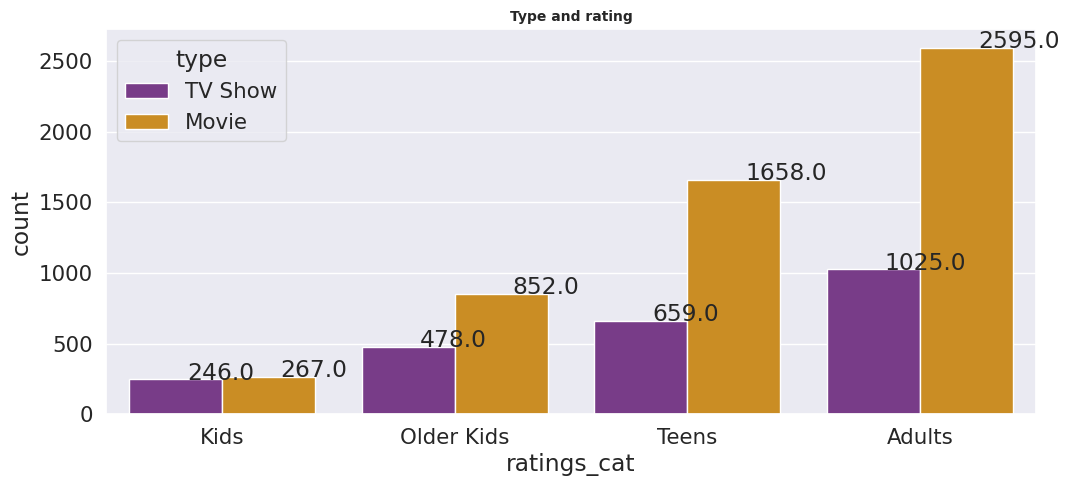

In [151]:
# Chart - 12 visualization code
# Rating
plt.figure(figsize=(12,5))
ax=sns.countplot(x='ratings_cat',hue='type', data=netflix_df,palette="CMRmap")
plt.title('Type and rating',size='10',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Netflix has more content in the adult section followed by teen section.

#### Chart - 14 - Correlation Heatmap

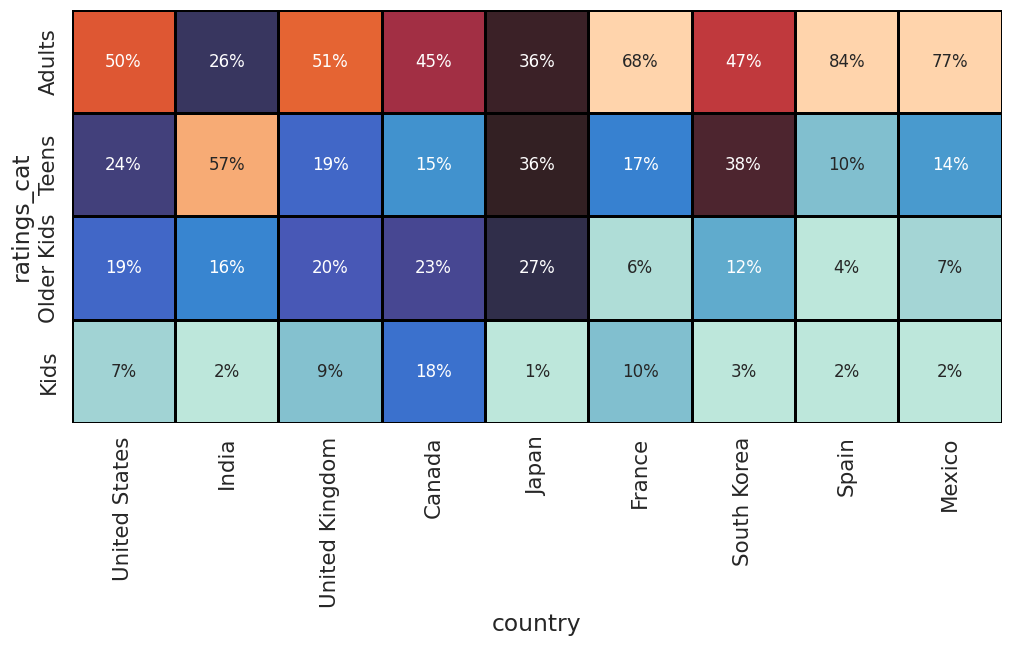

In [152]:
# Correlation Heatmap visualization code
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap_df = netflix_df.loc[netflix_df['country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['country'],heatmap_df['ratings_cat'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order,country_order2],cmap='icefire',annot=True, linecolor='Black', linewidths=1.0,square=True, cbar=False,
            fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

 Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most

##### 2. What is/are the insight(s) found from the chart?

United States and United Kingdom are closely alighned with their netflix target ages.

* Maximum adult content is from Spain.
* Maximum teen content is from India.
* Maximum older kids content is from Japan.
* Maximum kids content is from Canada.

#### Chart - 15 - Pair Plot 

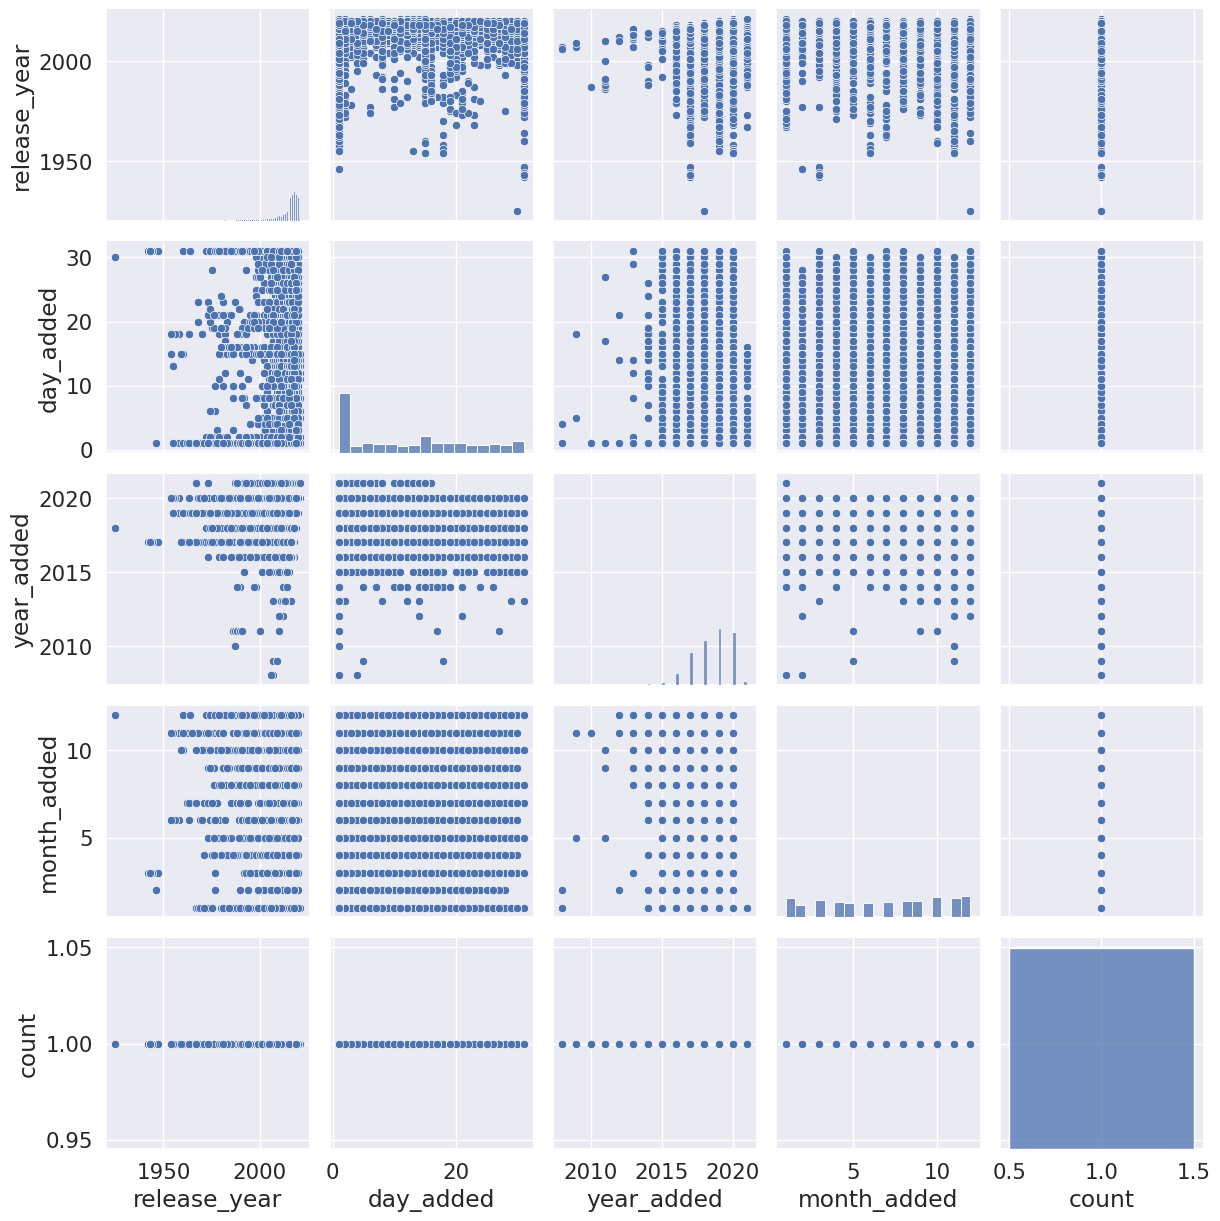

In [153]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=netflix_df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

 Movie release is not biased with respect to days or months, and no other relationship or trends can be observed from the pairplots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis(H0) - The Country is independent of Target_ages.

* Alternative Hypothesis(H1) - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [154]:
# Perform Statistical Test to obtain P-Value

In [155]:
# Making copy of df_clean_frame
hypothesis=netflix_df.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages 
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages                 
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values 
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [156]:
# Perform Statistical Test to obtain P-Value
# Import stats 
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
t-value -11.51992627853396


In [157]:
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [158]:
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

T-Test

##### Why did you choose the specific statistical test?

A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [159]:
# Handling Missing Values & Missing Value Imputation
# Calling our function again to check null values after adding new columns
Complete_columns_info(netflix_df)

 selected dataframe has 17 columns and 7787 rows


No of Null Values  % of null values  No of unique values  \
director                   2389              30.7                 4049   
cast                        718               9.2                 6831   
country                     507               6.5                  681   
date_added                   10               0.1                 1512   
month_added                  10               0.1                   12   
year_added                   10               0.1                   14   
day_added                    10               0.1                   31   
rating                        7               0.1                   14   
ratings_cat                   7               0.1                    4   
description                   0               0.0                 7769   
show_id                       0               0.0                 7787   
listed_in                     0               0.0                  492   
duration                      0               0.0                  216   
type                          0               0.0                    2   
release_year                  0               0.0                   73   
title                         0               0.0                 7787   
count                         0               0.0                    1   

                   Data Type  
director              string  
cast                  string  
country               string  
date_added    datetime64[ns]  
month_added          float64  
year_added           float64  
day_added            float64  
rating                string  
ratings_cat         category  
description           string  
show_id               object  
listed_in             string  
duration              object  
type                  string  
release_year           int64  
title                 string  
count                  int64

In [160]:
#Handling Missing Values & Missing Value Imputation
netflix_df['director'].fillna('unknown', inplace=True)
netflix_df['cast'].fillna('unknown', inplace=True)
netflix_df['country'].fillna(value=netflix_df['country'].mode()[0],inplace=True)
netflix_df.dropna(subset=['date_added','day_added','year_added','month_added','rating','ratings_cat'],inplace=True)

In [161]:
# Lets check again
Complete_columns_info(netflix_df)

 selected dataframe has 17 columns and 7770 rows


No of Null Values  % of null values  No of unique values  \
show_id                       0               0.0                 7770   
duration                      0               0.0                  216   
ratings_cat                   0               0.0                    4   
month_added                   0               0.0                   12   
year_added                    0               0.0                   14   
day_added                     0               0.0                   31   
description                   0               0.0                 7752   
listed_in                     0               0.0                  491   
rating                        0               0.0                   14   
type                          0               0.0                    2   
release_year                  0               0.0                   73   
date_added                    0               0.0                 1511   
country                       0               0.0                  681   
cast                          0               0.0                 6818   
director                      0               0.0                 4048   
title                         0               0.0                 7770   
count                         0               0.0                    1   

                   Data Type  
show_id               object  
duration              object  
ratings_cat         category  
month_added          float64  
year_added           float64  
day_added            float64  
description           string  
listed_in             string  
rating                string  
type                  string  
release_year           int64  
date_added    datetime64[ns]  
country               string  
cast                  string  
director              string  
title                 string  
count                  int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Null values of country column were replaced by mode of thet column, as a country producing most of the content might be a better option for replacement of null value.

Director and cast columns with maximum nnumber of null values cannot be replaced with mode therefore we have replaced them with "unknown".

Other columns mentioned in above frame, null values have been dropped, as there were very few null values in the columns.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [162]:
# Expand Contraction
cluster_df = netflix_df[['title']]
cluster_df['cluster_data'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [163]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

#### 3. Removing Punctuations

In [164]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(5)

cluster_data
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead his fellow ...
9      in a postapocalyptic world ragdoll robots hide...
21     a brilliant group of students become cardcount...

#### 4. Removing Stopwords & Removing White spaces

In [165]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

#### 5. Text Normalization

In [166]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [167]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(5)

cluster_data
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...
23:59  armi recruit found dead fellow soldier forc co...
9      postapocalypt world ragdol robot hide fear dan...
21     brilliant group student becom cardcount expert...

In [168]:
bag_of_words = cluster_df.cluster_data

In [169]:
netflix_df['Length(listed_in)'] = netflix_df['listed_in'].apply(lambda x: len(x))
netflix_df['Length(description)'] = netflix_df['description'].apply(lambda x: len(x))

netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added ratings_cat  count  Length(listed_in)  Length(description)  
0          8.0      Adults      1                 54                  136  
1         12.0      Adults      1                 28                  148  
2         12.0      Adults      1                 35                  149  
3         11.0       Teens      1                 56                  145  
4          1.0       Teens      1                  6                  143

##### Which text normalization technique have you used and why?

We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.

#### 6. Text Vectorization

In [170]:
# Vectorizing Text
netflix_df['description'] = netflix_df['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 17888)

##### Which text vectorization technique have you used and why?

TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

## 3. Data Scaling

In [171]:
# Scaling your data
X_features = netflix_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features.describe()

Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            143.101287          33.372458
std              10.618177          15.018409
min              61.000000           6.000000
25%             140.000000          23.000000
50%             146.000000          34.000000
75%             149.000000          47.000000
max             248.000000          79.000000

In [172]:
# Scaling your data
X_rescale=stdscaler.fit_transform(X_features)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [173]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
     

For n_clusters = 2, silhouette score is 0.3945610572692706
For n_clusters = 3, silhouette score is 0.43498587872384165
For n_clusters = 4, silhouette score is 0.4476424492936694
For n_clusters = 5, silhouette score is 0.4179451658408099
For n_clusters = 6, silhouette score is 0.42628580955404705
For n_clusters = 7, silhouette score is 0.4320280854344648
For n_clusters = 8, silhouette score is 0.4285955731740125
For n_clusters = 9, silhouette score is 0.39527989214010884
For n_clusters = 10, silhouette score is 0.39781187166637944
For n_clusters = 11, silhouette score is 0.3923711370988511
For n_clusters = 12, silhouette score is 0.3960209150522551
For n_clusters = 13, silhouette score is 0.39110159732205213
For n_clusters = 14, silhouette score is 0.39511785168782154
For n_clusters = 15, silhouette score is 0.401802789943096


### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is very important as

*    Fewer features mean less complexity.

*   You will need less storage space because you have fewer data.


*   Fewer features require less computation time.
*   Model accuracy improves due to less misleading data.

*   Algorithms train faster thanks to fewer data.
*   Reducing the data set’s feature dimensions helps visualize the data faster.

*   It removes noise and redundant features.

In [174]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

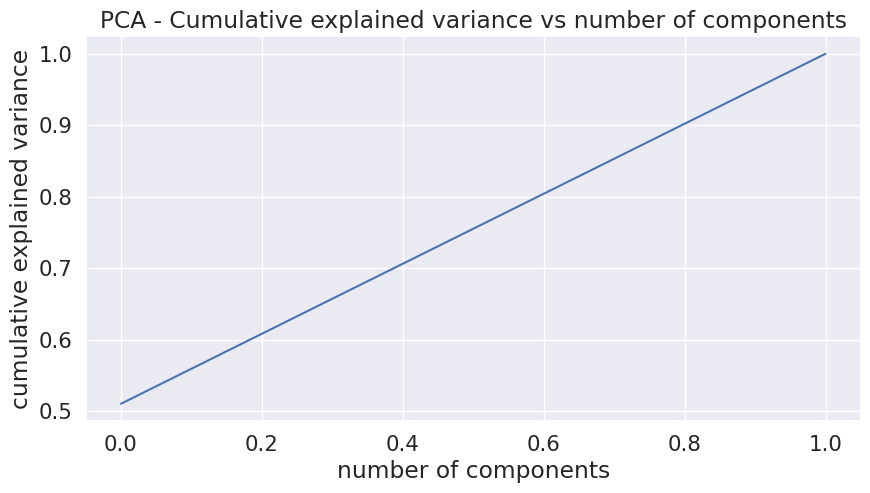

In [175]:
# Cumulative explained variance vs number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [176]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)

In [177]:
# Shape of transformed vectors
x_pca.shape

(7770, 2)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

: We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

## ***7. ML Model Implementation***

### ML Model - 1 K-means

In [178]:
# ML Model - 1 K means
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model
clusters = model.predict(X)

In [179]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.44761470302252365


In [180]:
# Adding a seperate column for the clusters L:
netflix_df["Cluster Label"] = clusters
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added ratings_cat  count  Length(listed_in)  Length(description)  \
0          8.0      Adults      1                 54                  136   
1         12.0      Adults      1                 28                  148   
2         12.0      Adults      1                 35                  149   
3         11.0       Teens      1                 56                  145   
4          1.0       Teens      1                  6                  143   

   Cluster Label  
0              1  
1              0  
2              1  
3              1  
4              0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [181]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(10) 

n clusters  silhouette score
2            4              0.45
1            3              0.43
4            6              0.43
5            7              0.43
6            8              0.43
3            5              0.42
7            9              0.40
8           10              0.40
10          12              0.40
12          14              0.40

For n_clusters = 2 The average silhouette_score is : 0.39416413076348666
For n_clusters = 3 The average silhouette_score is : 0.43498587872384165
For n_clusters = 4 The average silhouette_score is : 0.4474346057530305
For n_clusters = 5 The average silhouette_score is : 0.4179451658408099
For n_clusters = 6 The average silhouette_score is : 0.42784748146378654
For n_clusters = 7 The average silhouette_score is : 0.43178905879748486
For n_clusters = 8 The average silhouette_score is : 0.42222443355937683
For n_clusters = 9 The average silhouette_score is : 0.3956524074165999
For n_clusters = 10 The average silhouette_score is : 0.3949818235709966
For n_clusters = 11 The average silhouette_score is : 0.39231962393545666
For n_clusters = 12 The average silhouette_score is : 0.3923191080640547
For n_clusters = 13 The average silhouette_score is : 0.3907297123344184
For n_clusters = 14 The average silhouette_score is : 0.3982108256771202
For n_clusters = 15 The average silhouette_score is :

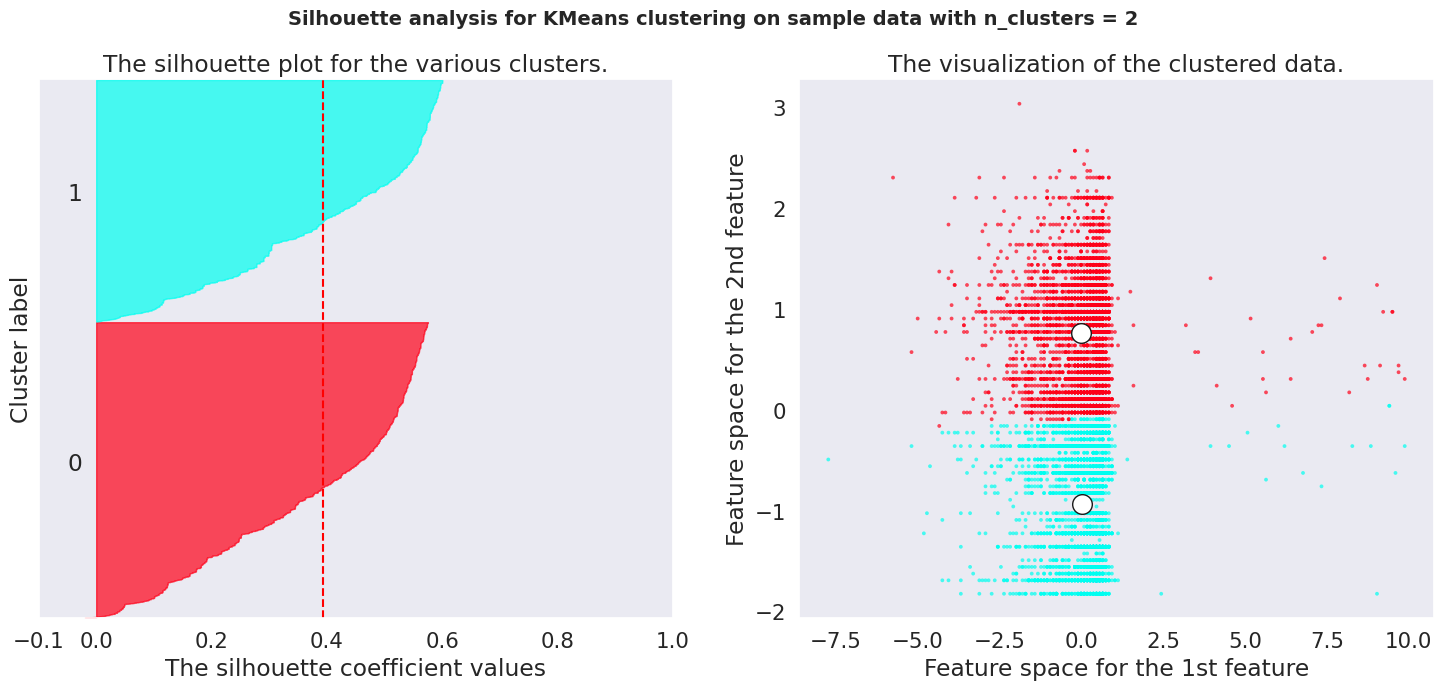

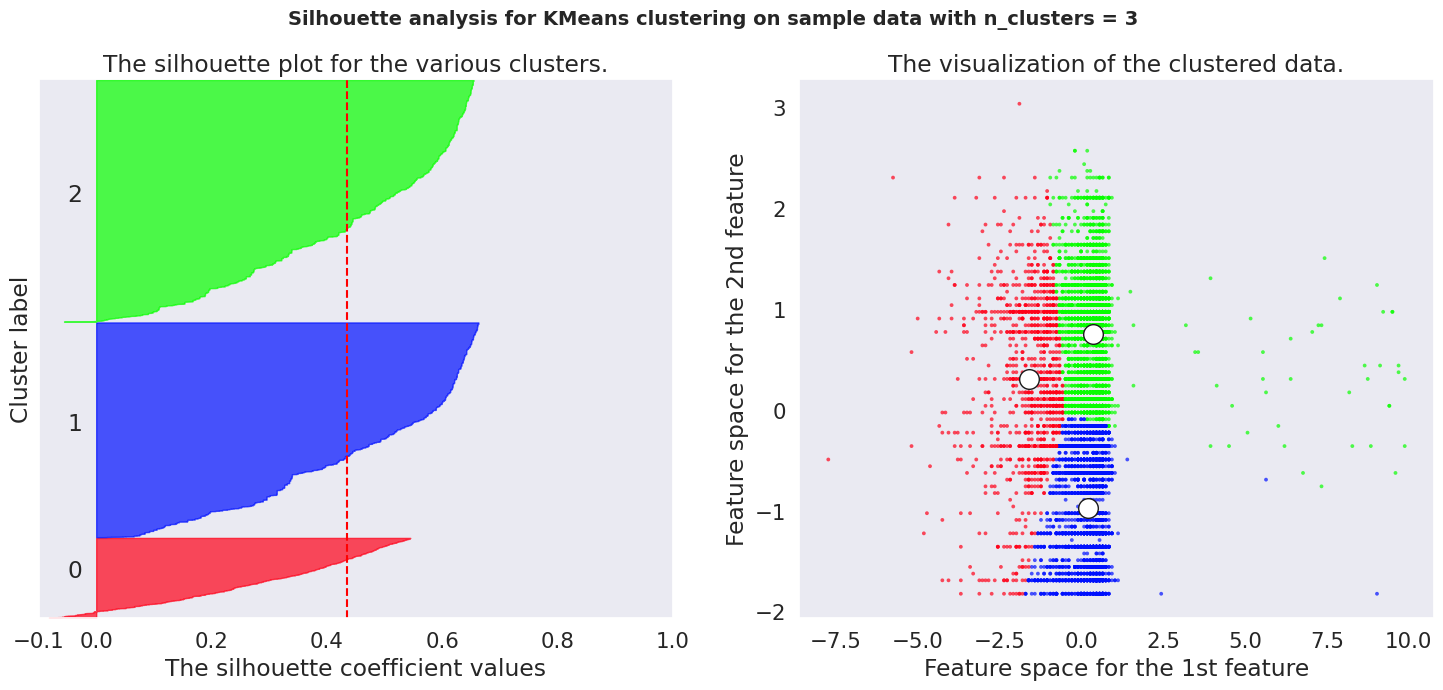

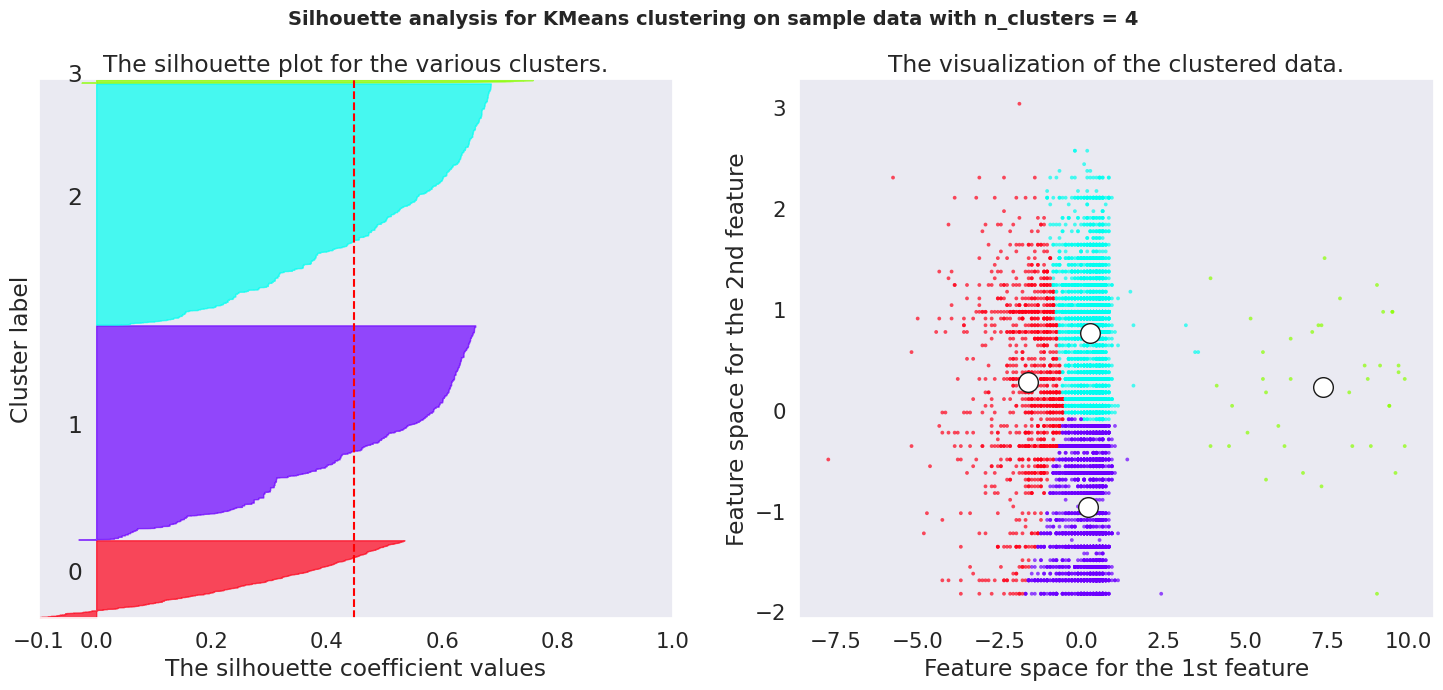

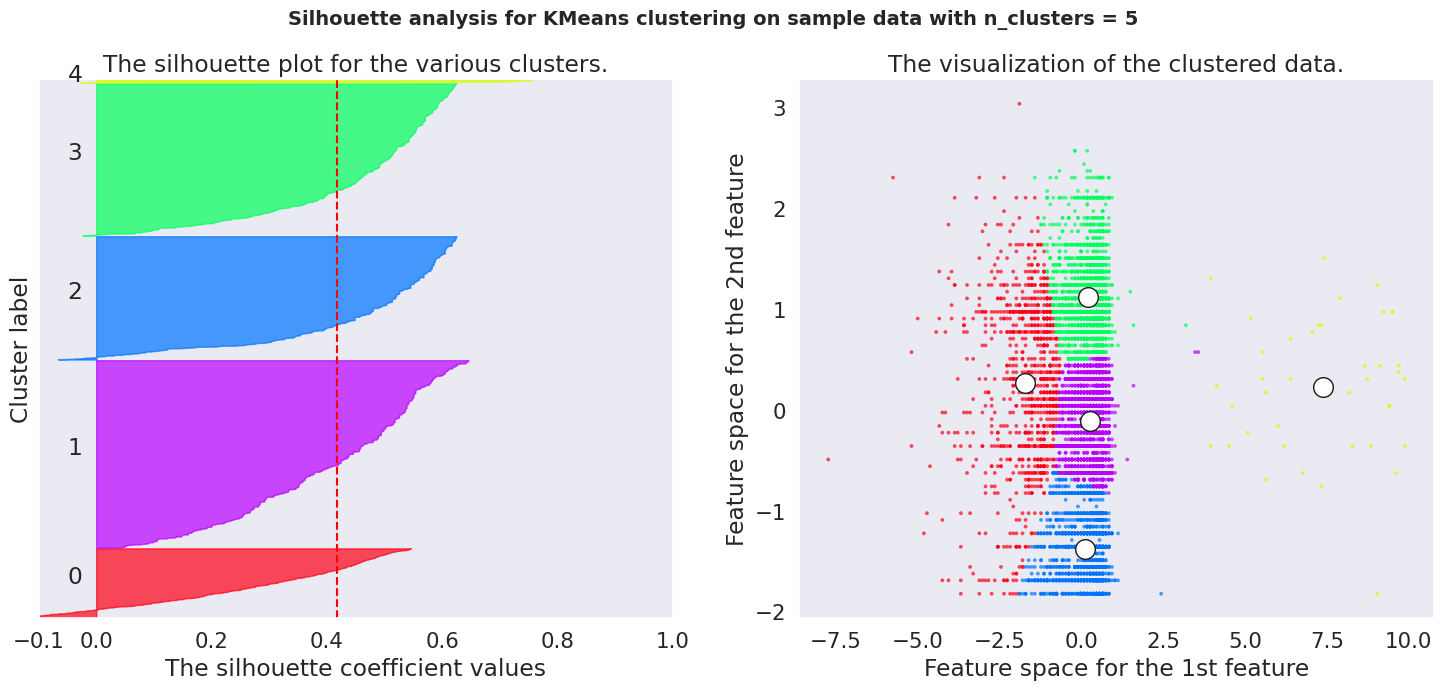

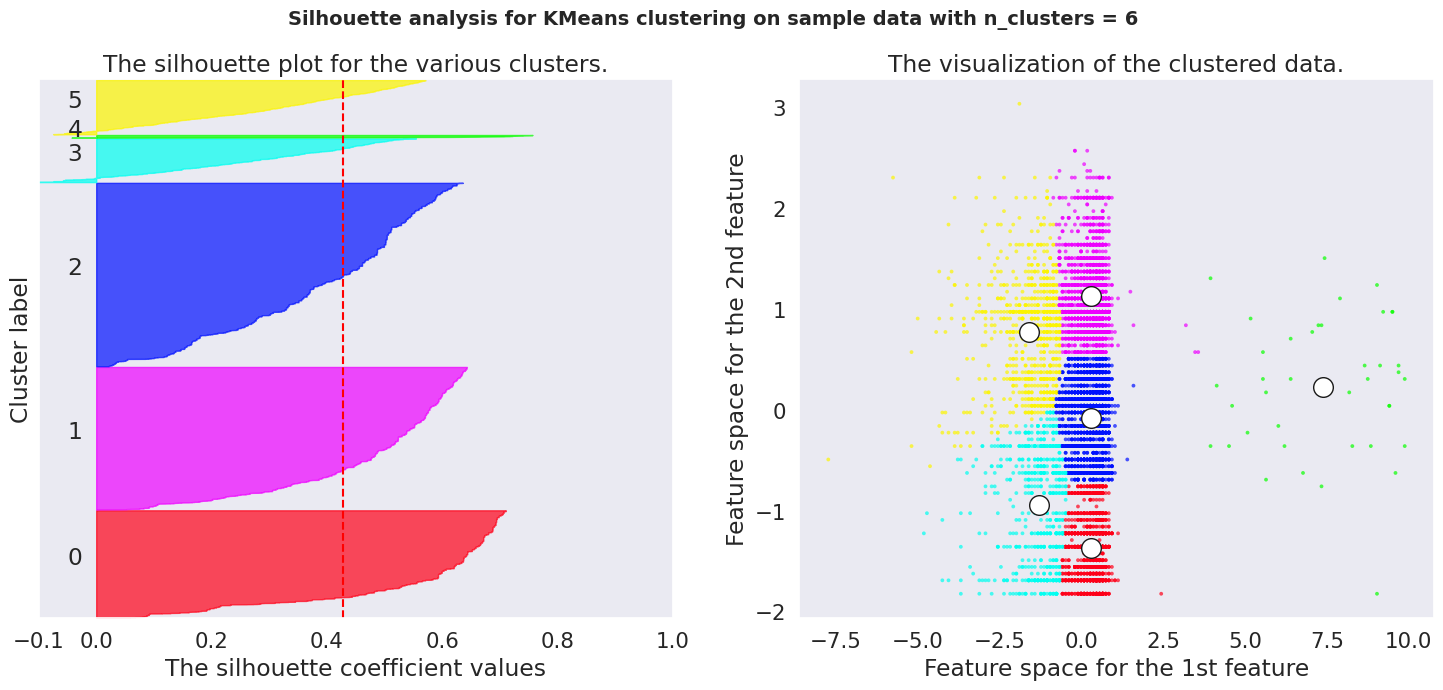

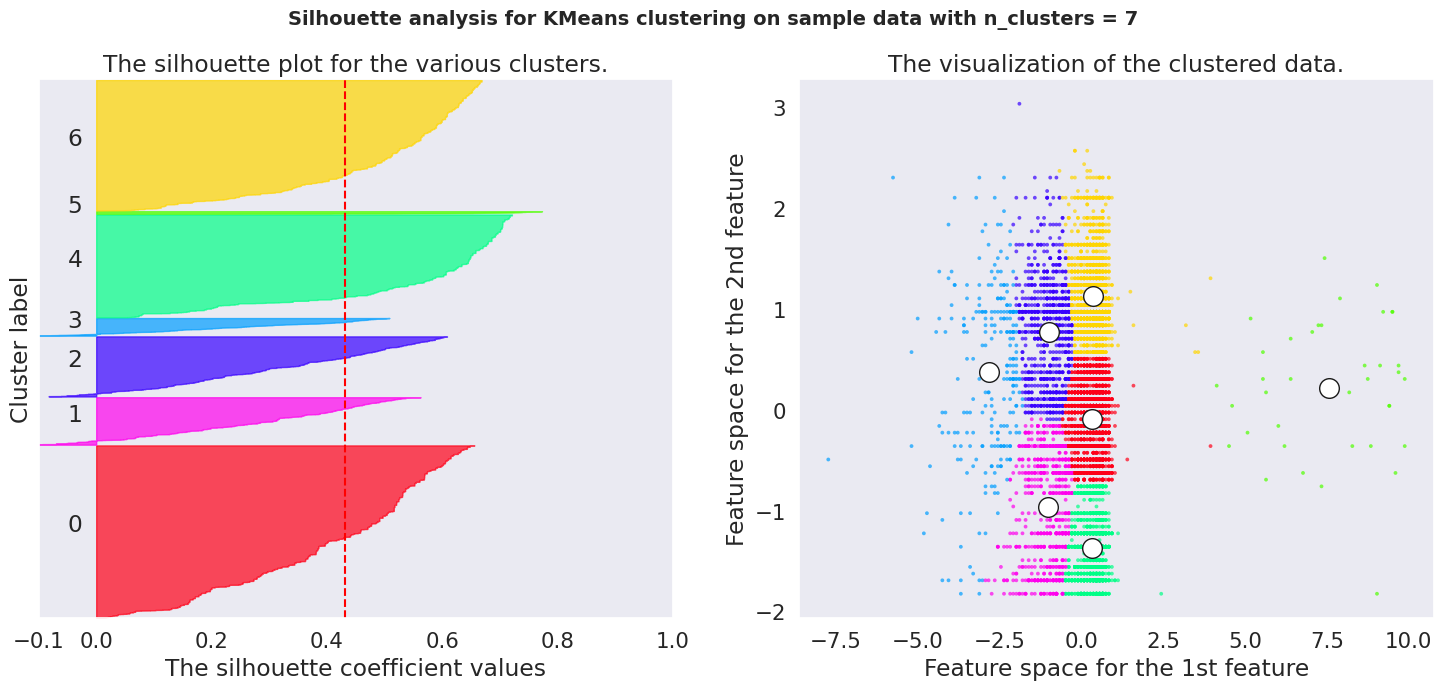

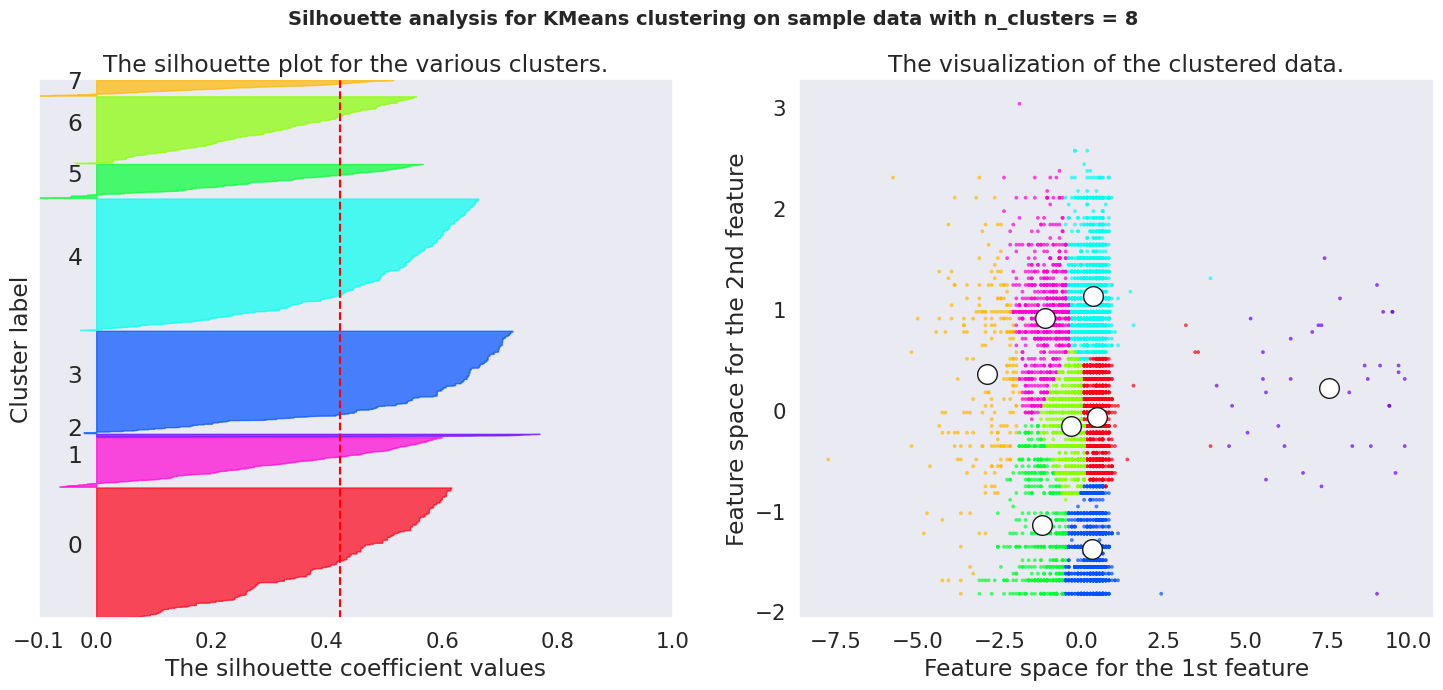

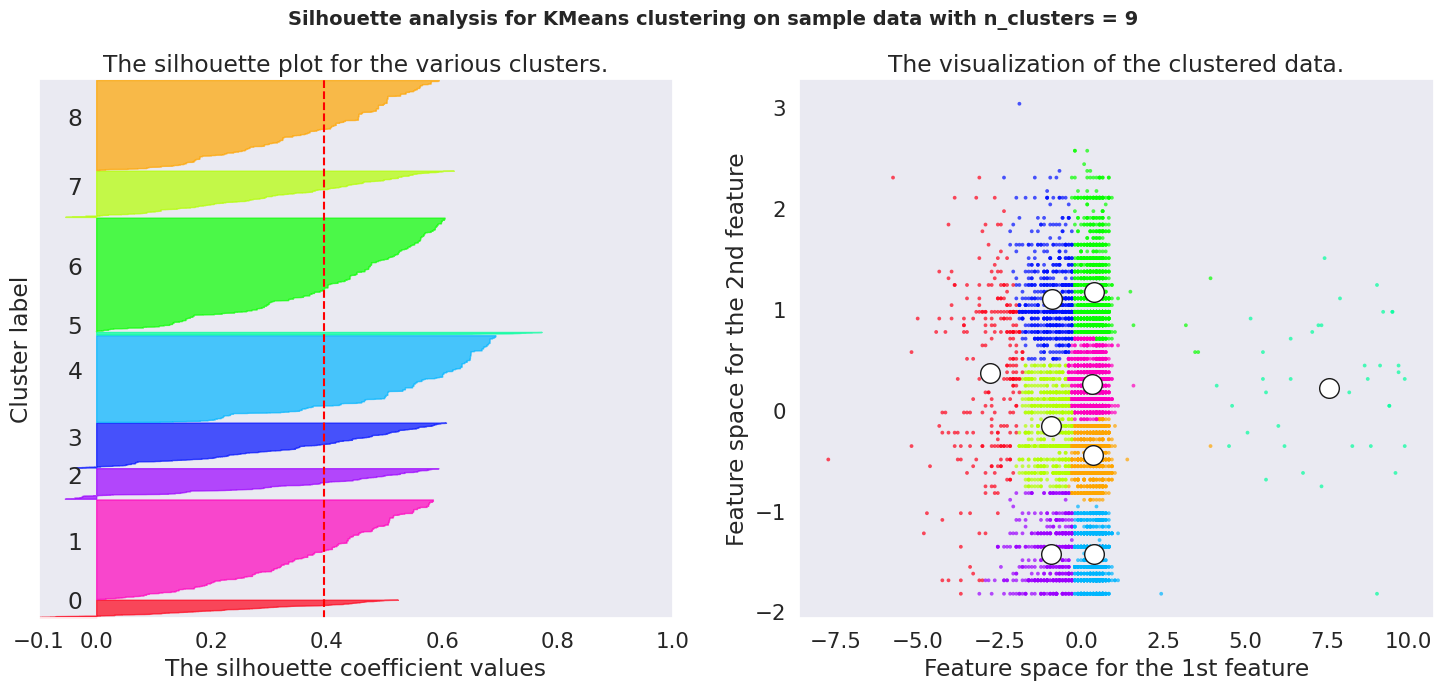

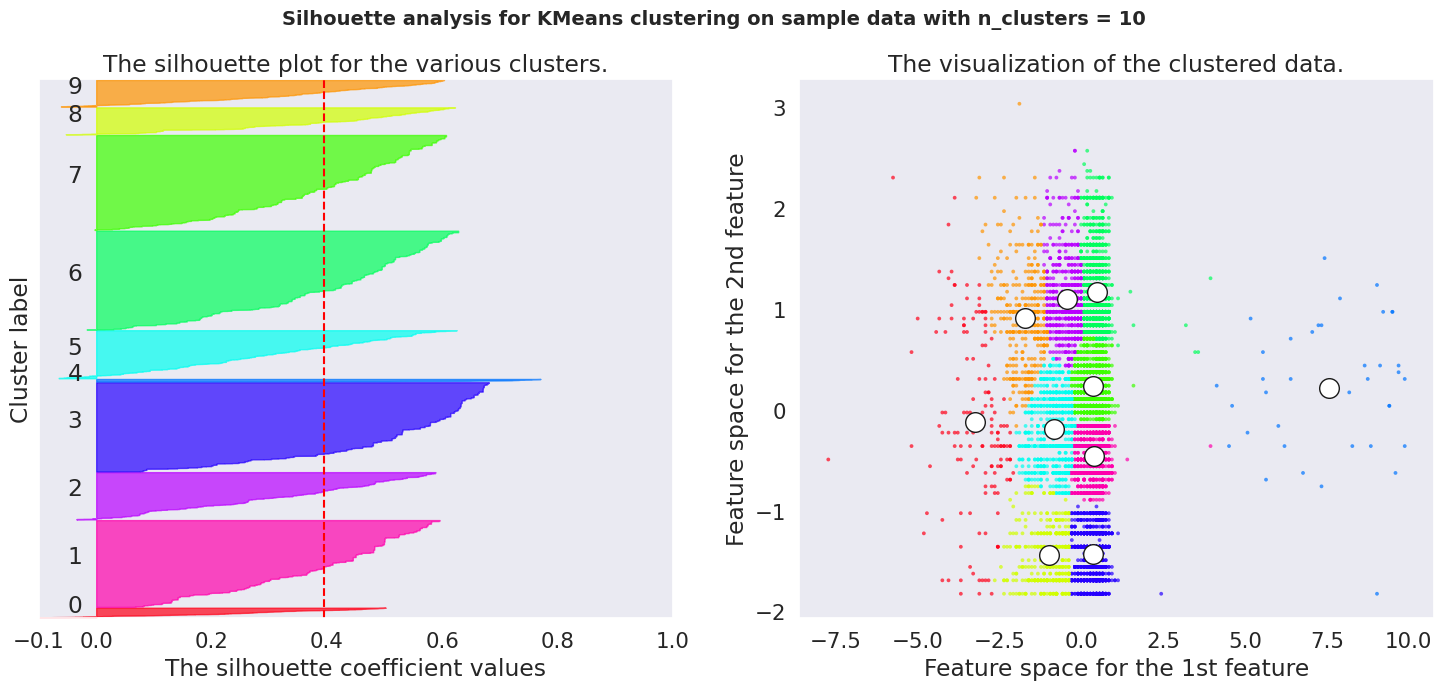

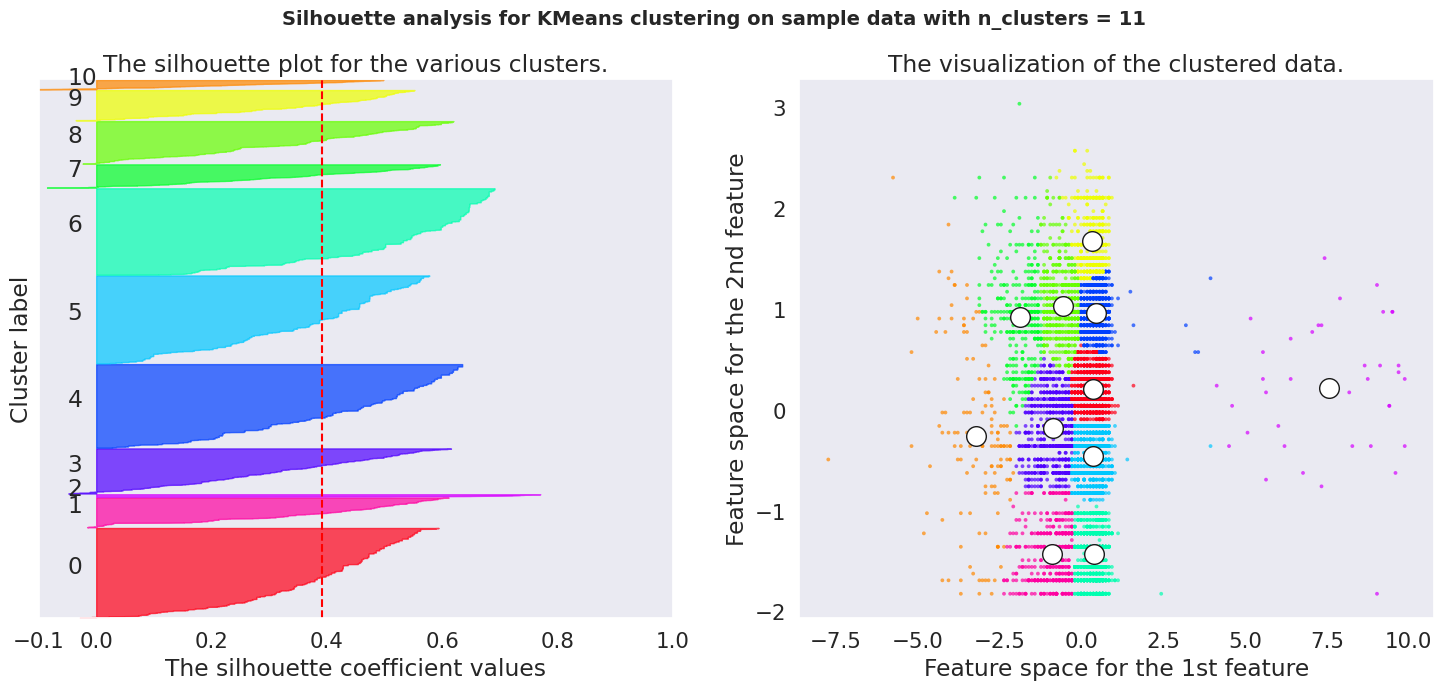

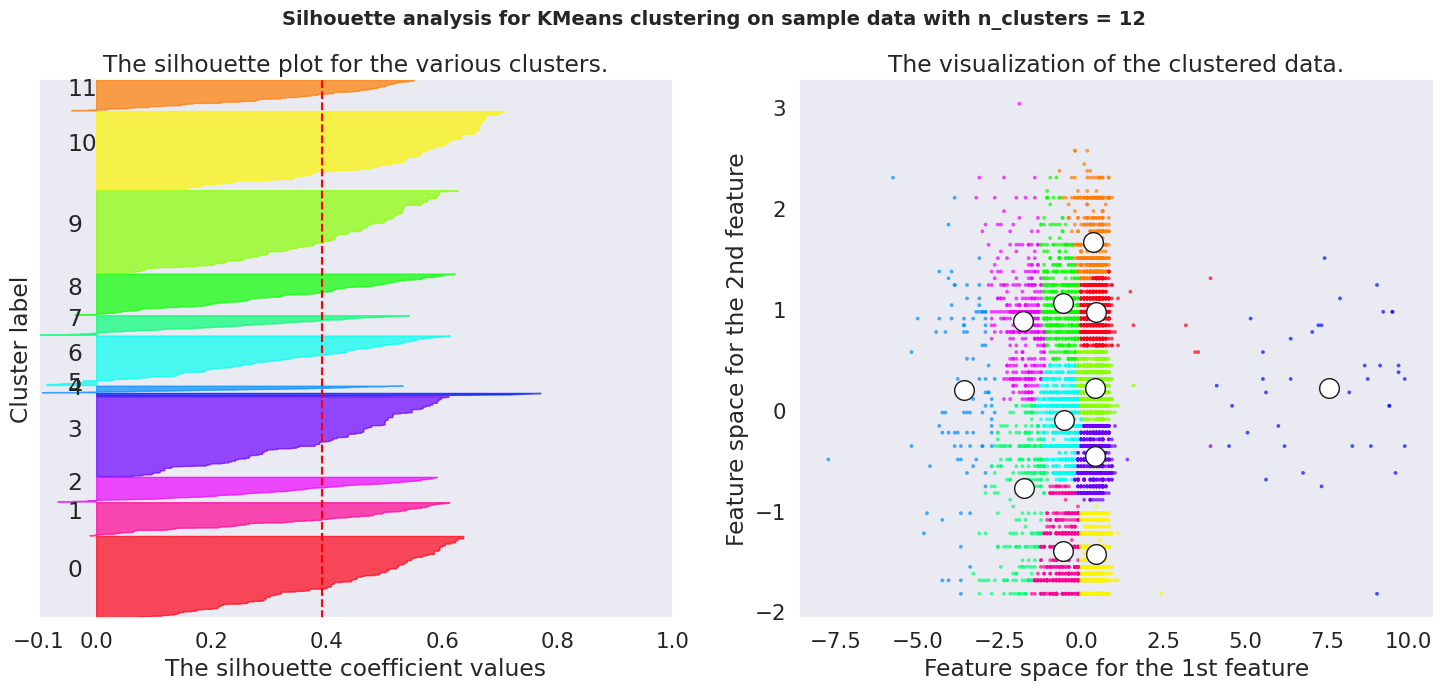

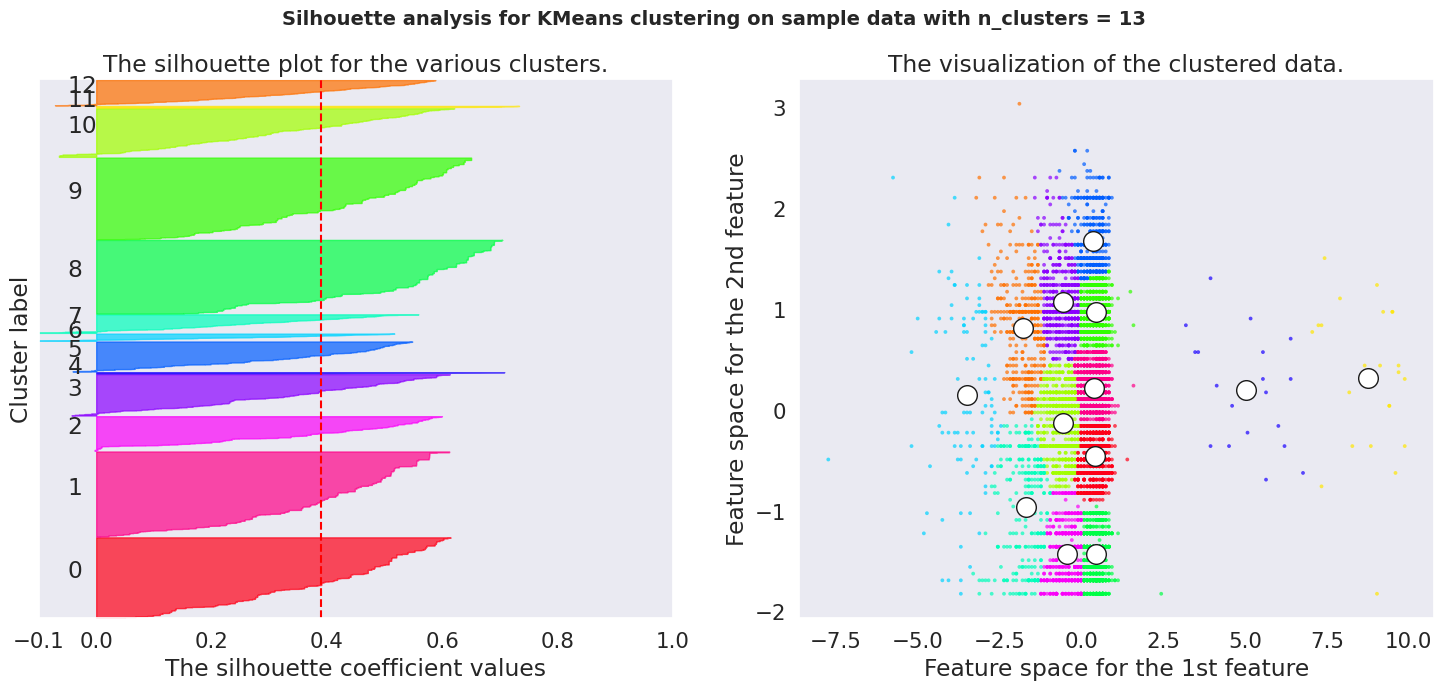

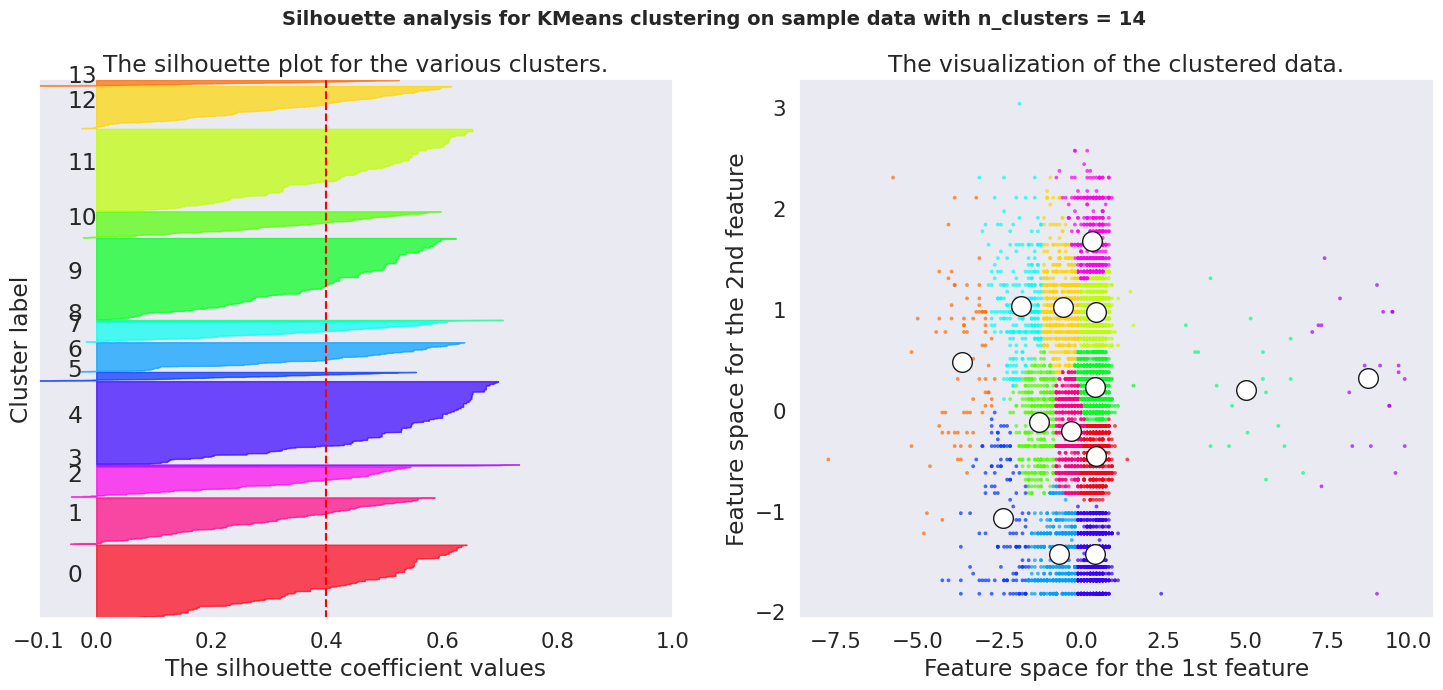

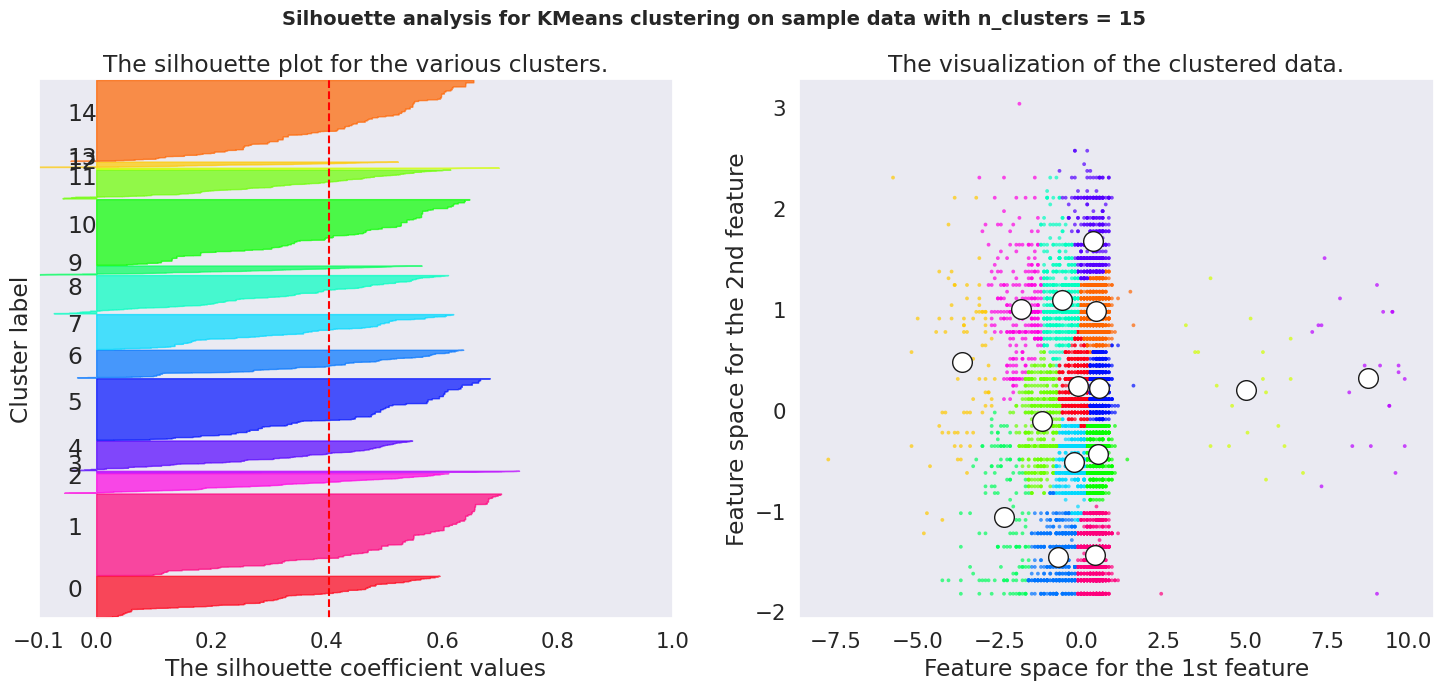

In [182]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **ML Model - 2    Elbow Curve**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

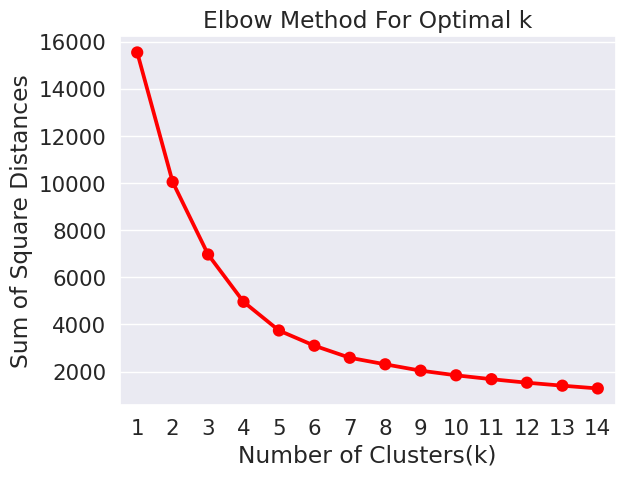

In [183]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Observation : K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation

### **ML Model - 3 : Hierarchical clustering.**

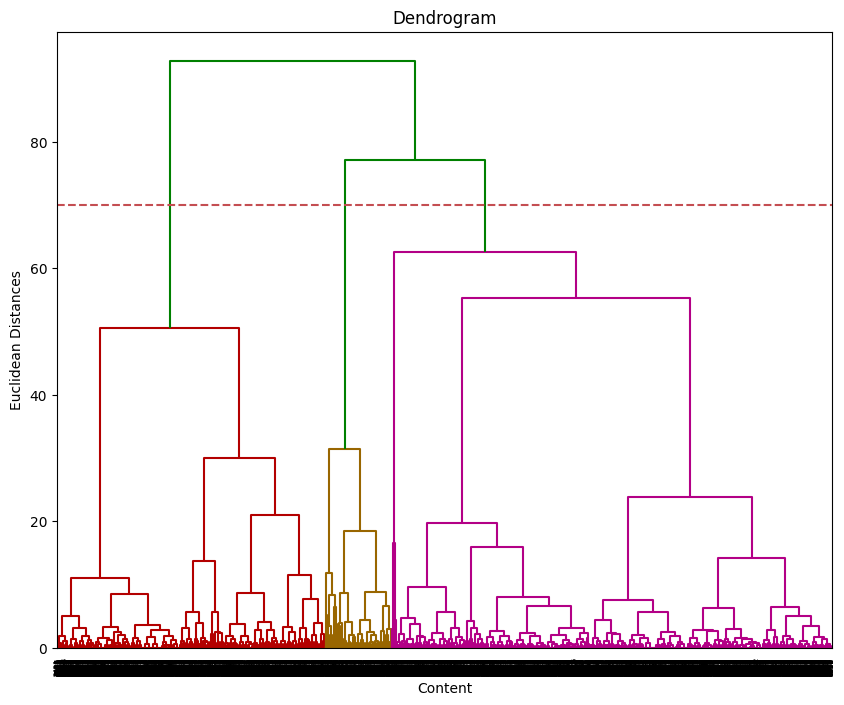

In [184]:
#  importing sch :
plt.figure(figsize=(10,8))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
# find largest vertical distance we can make without crossing any other horizontal line :
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

Observation: Here we can observe 3-4 major clusters and there there smilarities.

### **ML Model - 4 Agglomerative Clustering**

In [185]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [186]:
df_hierarchical =netflix_df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  ...  \
0 2020-08-14          2020  TV-MA  4 Seasons  ...   
1 2016-12-23          2016  TV-MA     93 min  ...   
2 2018-12-20          2011      R     78 min  ...   
3 2017-11-16          2009  PG-13     80 min  ...   
4 2020-01-01          2008  PG-13    123 min  ...   

                                         description day_added  year_added  \
0  In a future where the elite inhabit an island ...      14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...      23.0      2016.0   
2  When an army recruit is found dead, his fellow...      20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...      16.0      2017.0   
4  A brilliant group of students become card-coun...       1.0      2020.0   

   month_added  ratings_cat count  Length(listed_in)  Length(description)  \
0          8.0       Adults     1                 54                  136   
1         12.0       Adults     1                 28                  148   
2         12.0       Adults     1                 35                  149   
3         11.0        Teens     1                 56                  145   
4          1.0        Teens     1                  6                  143   

   Cluster Label  cluster  
0              1        0  
1              0        1  
2              1        1  
3              1        4  
4              0        5  

[5 rows x 21 columns]

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### Conclusion of EDA:
* Netflix have ~70% of movies and 30% of TV_shows in 2019.
* Comedy is most popular genre in Netflix, across all content.
* Netflix focuses to add new content majorly towards end of current year and start of new year.
* A sudden drop was obserbed after 2020 in count of new content, Which is because of covid pandemic.
* India is on 2nd place as compared to content availability, maximum content is available for United states.
* There are almost ~30% of netflix original movies and ~50 % TV-shows.
* Content category and countries:
  * Maximum adult content is from Spain.
  * Maximum teen content is from India.
  * Maximum older kids content is from Japan.
  * Maximum kids content is from Canada.
* All of this insights will be neccesary for business development and SWOT analysis.

Conclusion for clustering.
We tried 5 models for ML i.e.

K-means clustering
Elbow curve
Hierarchical clustering
Agglomerative clustering
K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation.

Thus K-means clustering will be best for this data set.

Cosine based recommender system was working really well.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***